https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [2]:
import pandas as pd
import numpy as np
# for windows using Path
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Testing file opening

In [4]:
data_folder = Path("C:\\Users\\User\\Dropbox\\My python-pandas code\\Bayes exercises")
# Note two backslashes for Windows
file_to_open = data_folder / "test2.txt"

#### For Mac
file_to_open = "/Users/arvindkarir/Dropbox/My python-pandas code/Bayes exercises/test2.txt"
#### Getting path from Terminal adds '\' to spaces, needs to be removed

In [5]:
f = open(file_to_open)
contents = f.read()
print(contents)

1,2,3
Q,a,s
C,v,b
4,3,5


#### Bring in Recession indicator

In [66]:
# Bring in the file for R
rdata = pd.read_csv('rdata.csv')

In [67]:
# Clean up the dates to be consistent
rdata['Date'] = pd.to_datetime(rdata['Date'])
rdata['quarter'] = rdata.Date.dt.quarter
rdata['year'] = rdata.Date.dt.year
recession = rdata.groupby(['year','quarter'])['R'].mean().reset_index()
print(recession[:10])

   year  quarter  R
0  1967        4  0
1  1968        1  0
2  1968        2  0
3  1968        3  0
4  1968        4  0
5  1969        1  0
6  1969        2  1
7  1969        3  1
8  1969        4  1
9  1970        1  1


In [8]:
pd.options.display.max_rows=1000

#### Bring in 10y3mo yield data

In [168]:
# Bring in the file for 10y3m
yield_data = pd.read_csv('data2.csv')

In [169]:
yield_data['Date'] = pd.to_datetime(yield_data['Date'])

In [170]:
yield_data['year'] = yield_data.Date.dt.year

In [171]:
yield_data['quarter'] = yield_data.Date.dt.quarter

In [172]:
len(yield_data), yield_data.size

(9847, 39388)

In [173]:
yield_data.head()

,Date,10y3mo,year,quarter
0,1982-01-04,2.32,1982.0,1.0
1,1982-01-05,2.24,1982.0,1.0
2,1982-01-06,2.43,1982.0,1.0
3,1982-01-07,2.46,1982.0,1.0
4,1982-02-01,2.50,1982.0,1.0


In [174]:
y_curve = yield_data.groupby(['year', 'quarter'])['10y3mo'].mean()
print(y_curve.head(10))

year    quarter
1982.0  1.0        0.928667
        2.0        0.692222
        3.0        2.690156
        4.0        2.971935
1983.0  1.0        2.293871
        2.0        1.858571
        3.0        1.955938
        4.0        2.482623
1984.0  1.0        2.429016
        2.0        2.796349
Name: 10y3mo, dtype: float64


In [175]:
y_curve.reset_index().columns
#y_curve.columns = ['date','effrate','quarter', 'year']
y_curve.head()

Index(['year', 'quarter', '10y3mo'], dtype='object')

year    quarter
1982.0  1.0        0.928667
        2.0        0.692222
        3.0        2.690156
        4.0        2.971935
1983.0  1.0        2.293871
Name: 10y3mo, dtype: float64

#### Bring in Fed fund rates

In [164]:
# Bring in the file for 10y3m
fed_rate_data = pd.read_csv('fedfunds.csv')

In [165]:
# convert date and quarter to correct format - in case of errors
fed_rate_data['date'] = pd.to_datetime(fed_rate_data['date'])
fed_rate_data['quarter'] = fed_rate_data.date.dt.quarter # Note that this already provides an average
    # of the rates. No need for: fed_rate_data = fed_rate_data.groupby(['year', 'quarter'])['fed_rate'].mean()

In [166]:
fed_rate_data['year'] = fed_rate_data.date.dt.year
fed_rate_data = fed_rate_data.groupby(['year', 'quarter'])['fed_rate'].mean()

In [167]:
fed_rate_data.reset_index().columns
fed_rate_data.columns = ['date','effrate','quarter', 'year']
fed_rate_data.head()

Index(['year', 'quarter', 'fed_rate'], dtype='object')

year  quarter
1954  3          1.026667
      4          0.986667
1955  1          1.343333
      2          1.500000
      3          1.940000
Name: fed_rate, dtype: float64

### Join various datasets

In [95]:
ydata = y_curve.reset_index().rename(columns={'10y3mo':'interest'})
rdata = rdata
fdata = fed_rate_data

In [96]:
ydata.head()
rdata.head()
fdata.head()
ydata.size, len(ydata)
rdata.size, len(rdata)
fdata.size, len(fdata)


,year,quarter,interest
0,1982.0,1.0,0.928667
1,1982.0,2.0,0.692222
2,1982.0,3.0,2.690156
3,1982.0,4.0,2.971935
4,1983.0,1.0,2.293871


,Date,R,quarter,year
0,1967-10-01,0,4,1967
1,1968-01-01,0,1,1968
2,1968-04-01,0,2,1968
3,1968-07-01,0,3,1968
4,1968-10-01,0,4,1968


year  quarter
1954  3          1.026667
      4          0.986667
1955  1          1.343333
      2          1.500000
      3          1.940000
Name: fed_rate, dtype: float64

(456, 152)

(824, 206)

(261, 261)

In [212]:
merge_data1 = pd.merge(rdata, ydata, on=['year', 'quarter'], how='left')
#r_merge_data = pd.merge(ydata, rdata, on=['year', 'quarter'], how='left')

In [213]:
len(merge_data1)

206

In [214]:
fdata2 = fdata.to_frame().reset_index() # convert from series to dataframe, plus reset index
fdata2.head()

,year,quarter,fed_rate
0,1954,3,1.026667
1,1954,4,0.986667
2,1955,1,1.343333
3,1955,2,1.500000
4,1955,3,1.940000


In [215]:
merge_data2 = pd.merge(merge_data1,fdata2, on=['year', 'quarter'], how='left')
merge_data2.head()

,Date,R,quarter,year,interest,fed_rate
0,1967-10-01,0,4,1967,NaN,4.173333
1,1968-01-01,0,1,1968,NaN,4.786667
2,1968-04-01,0,2,1968,NaN,5.980000
3,1968-07-01,0,3,1968,NaN,5.943333
4,1968-10-01,0,4,1968,NaN,5.916667


In [232]:
#try to export and see what it is....
export_excel = merge_data2.to_excel (r'test.xlsx', index = None, header=True)

#### exported the data to excel, cleaned up, moved columns around, dropped NaN values, R is the last column, let's bring it in.....

#### Use naive Bayes

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset


In [ ]:
# Import train_test_split function, use model_selection instead of cross_validation
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.3,random_state=109)
# 70% training and 30% test

In [ ]:
# Import train_test_split function, use model_selection instead of cross_validation
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                      test_size=0.3,random_state=109)

# 70% training and 30% test
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [181]:
merge_data2.query('interest==interest')

,Date,R,quarter,year,interest,fed_rate
57,1982-01-01,1,1,1982,0.928667,14.226667
58,1982-04-01,1,2,1982,0.692222,14.513333
59,1982-07-01,0,3,1982,2.690156,11.006667
60,1982-10-01,0,4,1982,2.971935,9.286667
61,1983-01-01,0,1,1983,2.293871,8.653333
62,1983-04-01,0,2,1983,1.858571,8.803333
63,1983-07-01,0,3,1983,1.955938,9.460000
64,1983-10-01,0,4,1983,2.482623,9.430000
65,1984-01-01,0,1,1984,2.429016,9.686667
66,1984-04-01,0,2,1984,2.796349,10.556667


####Plotting

In [21]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

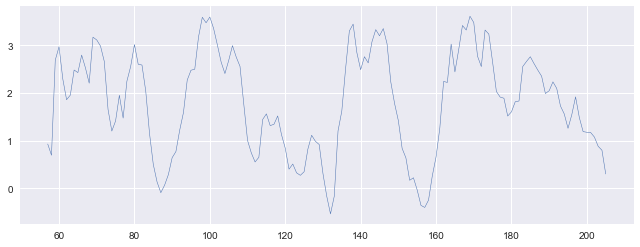

In [22]:
merge_data['interest'].plot(linewidth=0.5);

Text(0,0.5,'%')

Text(0,0.5,'%')

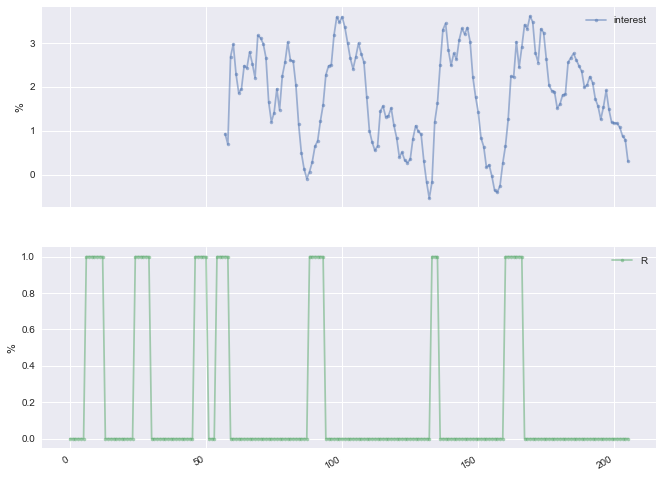

In [23]:
cols_plot = ['interest', 'R']
axes = merge_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots='True')
for ax in axes:
    ax.set_ylabel('%')

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [ ]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)
print(wine.data.shape)
print(wine.data[0:2])
print(wine.target)

In [ ]:
# Import train_test_split function, use model_selection instead of cross_validation
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.3,random_state=109)
# 70% training and 30% test

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))